# Logistic Regression

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import joblib

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, minmax_scale, MaxAbsScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LogisticRegression

# Define Functions

#### Compare Two Populations

In [2]:
# Function to plot two populations
import scipy.stats as stats
def variableDataCompare(index1, index2, population1, population2, label1, label2, title, xlabel, ylabel):
    
    # set the figure size
    plt.figure(figsize=(20,8))

    # Scatter Plot of Data
    plt.subplot(2,1,1)
    plt.scatter(index1, population1, marker='o', color='g', label=label1)
    plt.scatter(index2, population2, marker='x', color='r', label=label2)
    plt.title(title,color='k', size=14, weight='bold')
    plt.xlabel("index")
    plt.ylabel(xlabel)
    plt.legend(loc="best")
    plt.grid(alpha=0.5)
    
    # Historgram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 50, density=False, alpha=0.7, color='g', label=label1)
    plt.hist(population2, 50, density=False, alpha=0.7, color='r', label=label2)
    plt.axvline(population1.mean(), color='g', linestyle='dashed', linewidth=2)
    plt.axvline(population2.mean(), color='r', linestyle='dashed', linewidth=2)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.legend(loc="best")
    plt.yscale('linear')
    plt.grid(alpha=0.5)
    
    # Save the Figure
#    plt.savefig("./Images/" + title.replace(" ", "") + ".png")
    
    # Student t-test
    print('\033[1m' + "Student t-test with unequal variance" + '\033[0m')
    print(stats.ttest_ind(population1, population2, equal_var=False))
    
    # ANOVA test
    print('\033[1m' + '\nANOVA test' + '\033[0m')
    print(stats.f_oneway(population1, population2))
    
    # Kruskal
    print('\033[1m' + '\nKruskal test' + '\033[0m')
    print(stats.kruskal(population1, population2))
    
    return

#### Scatter Plot of Two Populations

In [3]:
 def scatterPlot(index, population1, population2, population3, label1, label2, label3, title, ylabel):
    # Scatter Plot of Data
    plt.figure(figsize=(15,5))
    plt.subplot(1,1,1)
    plt.scatter(index, population1, marker='o', color='b', label=label1)
    plt.scatter(index, population2, marker='x', color='g', label=label2)
    plt.scatter(index, population3, marker='+', color='r', label=label3)
    plt.title(title,color='k', size=14, weight='bold')
    plt.xlabel("index")
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid(alpha=0.5)

#### Scatter Plot

In [4]:
def scatter(independent, dependent, label, title, xlabel, ylabel):
    # Scatter Plot of Data
    plt.figure(figsize=(15,5))
    plt.subplot(1,1,1)
    plt.scatter(independent, dependent, marker='o', color='b', label=label)
    plt.title(title,color='k', size=14, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid(alpha=0.5)

## Load Test and Train Set Data
NOTE:  ETL and Splitting of Test and Train Data was performed in another Notebook

In [5]:
path = '../data/'
X_train = pd.read_csv(path + "X_train.csv")
X_test = pd.read_csv(path + "X_test.csv")
y_train = pd.read_csv(path + "y_train.csv")
y_test = pd.read_csv(path + "y_test.csv")

In [6]:
# Apply the MinMax Scaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Label encode the dependent variable, then Hot encode it
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Test Logistic Regression Model
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Loop Through Creating New Models and Varying Inputs

In [8]:
# Create Arrays to Capture Scores and Inputs
train_scores = []
test_scores = []
scoreAvg = []
tols = []
w8s = []
numIters = []
solve = []

# Create Arrays for Inputs to Test
tolerances = [0.1, 0.001, 0.00001, 0.0000001]
weights = ['balanced','none']
max_iterations = [10, 50, 100, 500]
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']

# Loop through 10 times
for x in range(10):
    for iterations in max_iterations:
        for solver in solvers:
            for tol in tolerances:
                for weight in weights:
                    # Create the Logistic Regression Model
                    if weight == 'none':
                        classifer = LogisticRegression(verbose=2, tol=tol, max_iter=iterations, solver=solver)
                    else:
                        classifier = LogisticRegression(verbose=2, tol=tol, class_weight=weight, max_iter=iterations, solver=solver)
                    
                    # Fit the Model to the train data and obtain the scores
                    classifier.fit(X_train_scaled, y_train_encoded)
                    trainScore = classifier.score(X_train_scaled, y_train_encoded)
                    testScore = classifier.score(X_test_scaled, y_test_encoded)
                    
                    # Append the scores and inputs for review
                    train_scores.append(trainScore)
                    test_scores.append(testScore)
                    scoreAvg.append((trainScore+testScore)/2)
                    tols.append(tol)
                    w8s.append(weight)
                    numIters.append(iterations)
                    solve.append(solver)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[P

convergence after 9 epochs took 0 seconds
convergence after 10 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sa

convergence after 9 epochs took 0 seconds
convergence after 10 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 35 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers

convergence after 12 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 85 epochs took 0 seconds
convergence after 71 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 6 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_mo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 8 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 87 epochs took 0 seconds
convergence after 75 epochs took 0 seconds
convergence after 145 epochs took 0 seconds
convergence after 136 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 181 epochs took 0 seconds
convergence after 177 epochs took 0 seconds
convergence after 357 epochs took 0 seconds
convergence after 350 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[LibLinear][LibLinear][LibLinear][LibLinear]max_iter reached after 0 seconds
convergence after 9 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 10 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

convergence after 9 epochs took 0 seconds
convergence after 10 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 84 epochs took 0 seconds
convergence after 75 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 6 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

convergence after 12 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 88 epochs took 0 seconds
convergence after 84 epochs took 0 seconds
convergence after 140 epochs took 0 seconds
convergence after 145 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 183 epochs took 0 seconds
convergence after 182 epochs took 0 seconds
convergence after 354 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

convergence after 353 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]max_iter reached after 0 seconds
convergence after 7 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sa

convergence after 7 epochs took 0 seconds
convergence after 10 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s

convergence after 10 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 34 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 76 epochs took 0 seconds
convergence after 83 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 10 epochs took 0 seconds
convergence after 10 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 83 epochs took 0 seconds
convergence after 67 epochs took 0 seconds
convergence after 148 epochs took 0 seconds
convergence after 141 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 186 epochs took 0 seconds
convergence after 176 epochs took 0 seconds
convergence after 354 epochs took 0 seconds
convergence after 355 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[LibLinear][LibLinear]convergence after 9 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:94

max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 9 epochs took 0 seconds
convergence after 10 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 5 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

convergence after 25 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 7 epochs took 0 seconds
convergence after 12 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 81 epochs took 0 seconds
convergence after 80 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_mo

convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 89 epochs took 0 seconds
convergence after 79 epochs took 0 seconds
convergence after 142 epochs took 0 seconds
convergence after 141 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 181 epochs took 0 seconds

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work


convergence after 181 epochs took 0 seconds
convergence after 352 epochs took 0 seconds
convergence after 355 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 8 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

convergence after 9 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 10 epochs took 0 seconds
convergence after 12 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 71 epochs took 0 seconds
convergence after 73 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 6 epochs took 0 seconds
convergence after 10 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 79 epochs took 0 seconds
convergence after 82 epochs took 0 seconds
convergence after 151 epochs took 0 seconds
convergence after 130 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 182 epochs took 0 seconds
convergence after 181 epochs took 0 seconds

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


convergence after 351 epochs took 0 seconds
convergence after 349 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 9 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds

C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:947: Conve


max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_mo

max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 90 epochs took 0 seconds
convergence after 82 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 3 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 26 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 26 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 11 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 87 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 88 epochs took 0 seconds
convergence after 153 epochs took 0 seconds
convergence after 119 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 6 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 182 epochs took 0 seconds
convergence after 175 epochs took 0 seconds
convergence after 352 epochs took 0 seconds
convergence after 357 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

convergence after 8 epochs took 0 seconds
convergence after 6 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

convergence after 13 epochs took 0 seconds
convergence after 9 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 6 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 7 epochs took 0 seconds
convergence after 12 epochs took 0 seconds
convergence after 34 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 80 epochs took 0 seconds
convergence after 85 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
max_iter reached after 0 seconds


C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[P

max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 10 epochs took 0 seconds
convergence after 9 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 68 epochs took 0 seconds
convergence after 84 epochs took 0 seconds
convergence after 147 epochs took 0 seconds
convergence after 150 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 181 epochs took 0 seconds
convergence after 183 epochs took 0 seconds
convergence after 356 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

convergence after 351 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear]

C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sa

[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 12 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 7 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 91 epochs took 0 seconds
convergence after 76 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

convergence after 9 epochs took 0 seconds
convergence after 9 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 84 epochs took 0 seconds
convergence after 83 epochs took 0 seconds
convergence after 148 epochs took 0 seconds
convergence after 149 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 182 epochs took 0 seconds
convergence after 180 epochs took 0 seconds
convergence after 354 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 356 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 10 epochs took 0 seconds
max_iter reached after 0 seconds
convergence after 9 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: 

[LibLinear][LibLinear][LibLinear]convergence after 9 epochs took 0 seconds
convergence after 10 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 4 epochs took 0 seconds

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


convergence after 27 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

convergence after 8 epochs took 0 seconds
convergence after 9 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 78 epochs took 0 seconds
convergence after 82 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model

convergence after 8 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 69 epochs took 0 seconds
convergence after 80 epochs took 0 seconds
convergence after 142 epochs took 0 seconds
convergence after 145 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 181 epochs took 0 seconds
convergence after 188 epochs took 0 seconds
convergence after 353 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 356 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 7 epochs took 0 seconds
convergence after 9 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

convergence after 9 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paral

convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 80 epochs took 0 seconds
convergence after 79 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers

convergence after 9 epochs took 0 seconds
convergence after 12 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 82 epochs took 0 seconds
convergence after 85 epochs took 0 seconds
convergence after 146 epochs took 0 seconds
convergence after 155 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 171 epochs took 0 seconds
convergence after 180 epochs took 0 seconds
convergence after 359 epochs took 0 seconds
convergence after 355 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


# Review the Results

#### Create a Dataframe with the Results and Inputs

In [9]:
results = pd.DataFrame(list(zip(train_scores, test_scores, scoreAvg, tols, w8s, numIters, solve)), columns = ['Train Score',
    'Test Score', 'Avg Score', 'Tolerance', 'Weight', 'Max Iterations', 'Solver'])
results

,Train Score,Test Score,Avg Score,Tolerance,Weight,Max Iterations,Solver
0,0.878378,0.810811,0.844595,1.000000e-01,balanced,10,newton-cg
1,0.878378,0.810811,0.844595,1.000000e-01,none,10,newton-cg
2,0.882883,0.810811,0.846847,1.000000e-03,balanced,10,newton-cg
3,0.882883,0.810811,0.846847,1.000000e-03,none,10,newton-cg
4,0.882883,0.810811,0.846847,1.000000e-05,balanced,10,newton-cg
...,...,...,...,...,...,...,...
1595,0.882883,0.810811,0.846847,1.000000e-03,none,500,liblinear
1596,0.882883,0.810811,0.846847,1.000000e-05,balanced,500,liblinear
1597,0.882883,0.810811,0.846847,1.000000e-05,none,500,liblinear
1598,0.882883,0.810811,0.846847,1.000000e-07,balanced,500,liblinear


#### Plot the Train, Test and Avg(Train & Test) Scores

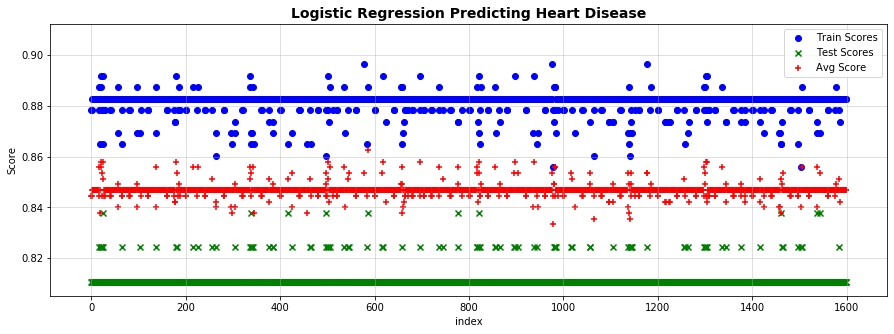

In [10]:
scatterPlot(results.index, results['Train Score'], results['Test Score'], results['Avg Score'], 
            'Train Scores', 'Test Scores', 'Avg Score', 'Logistic Regression Predicting Heart Disease', 'Score')

#### Group the data by the Inputs since there were multiple iterations

In [11]:
groupBySolver = results.groupby(['Solver','Tolerance','Weight','Max Iterations'])
groupBySolver.head()

,Train Score,Test Score,Avg Score,Tolerance,Weight,Max Iterations,Solver
0,0.878378,0.810811,0.844595,1.000000e-01,balanced,10,newton-cg
1,0.878378,0.810811,0.844595,1.000000e-01,none,10,newton-cg
2,0.882883,0.810811,0.846847,1.000000e-03,balanced,10,newton-cg
3,0.882883,0.810811,0.846847,1.000000e-03,none,10,newton-cg
4,0.882883,0.810811,0.846847,1.000000e-05,balanced,10,newton-cg
...,...,...,...,...,...,...,...
795,0.882883,0.810811,0.846847,1.000000e-03,none,500,liblinear
796,0.882883,0.810811,0.846847,1.000000e-05,balanced,500,liblinear
797,0.882883,0.810811,0.846847,1.000000e-05,none,500,liblinear
798,0.882883,0.810811,0.846847,1.000000e-07,balanced,500,liblinear


#### Look at Each Input Plotted Against Average Score

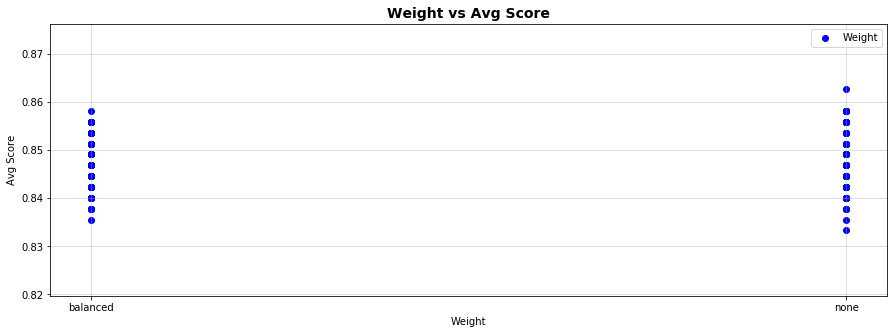

In [12]:
scatter(results['Weight'], results['Avg Score'], 'Weight', 'Weight vs Avg Score', 'Weight', 'Avg Score')

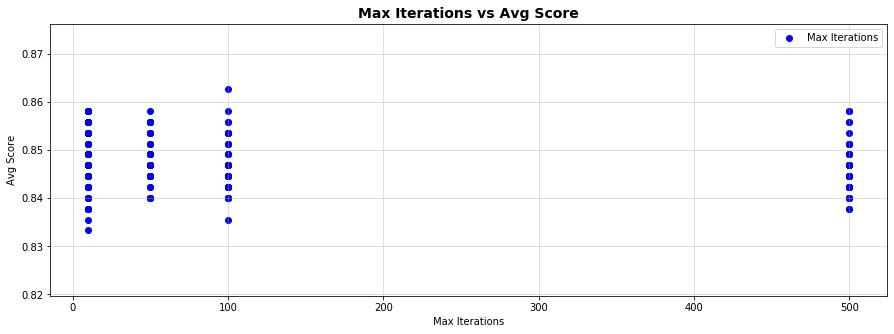

In [13]:
scatter(results['Max Iterations'], results['Avg Score'], 'Max Iterations', 'Max Iterations vs Avg Score', 'Max Iterations', 'Avg Score')

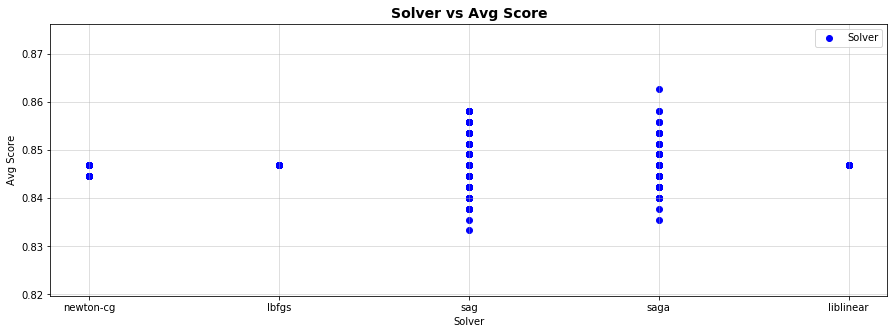

In [14]:
scatter(results['Solver'], results['Avg Score'], 'Solver', 'Solver vs Avg Score', 'Solver', 'Avg Score')

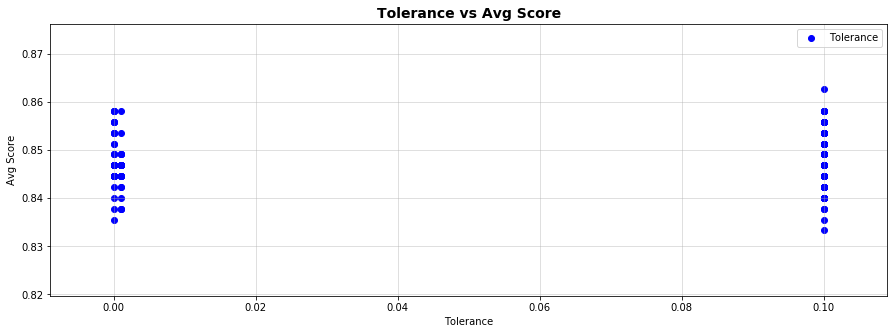

In [15]:
scatter(results['Tolerance'], results['Avg Score'], 'Tolerance', 'Tolerance vs Avg Score', 'Tolerance', 'Avg Score')

#### Determine the Max Average, Train and Test Scores then Create a new Dataframe

In [16]:
results['Avg Score'].max()

0.8626126126126126

In [17]:
results['Train Score'].max()

0.8963963963963963

In [18]:
results['Test Score'].max()

0.8378378378378378

In [19]:
topScores = results['Avg Score'] == results['Avg Score'].max()

In [20]:
topTrain = results['Train Score'] ==results['Train Score'].max()

In [21]:
topTest = results['Test Score'] == results['Test Score'].max()

In [22]:
finalists = results[topScores | topTrain | topTest]

In [23]:
finalists

,Train Score,Test Score,Avg Score,Tolerance,Weight,Max Iterations,Solver
24,0.864865,0.837838,0.851351,1.000000e-01,balanced,10,saga
338,0.869369,0.837838,0.853604,1.000000e-03,balanced,10,sag
417,0.864865,0.837838,0.851351,1.000000e-01,none,100,sag
497,0.860360,0.837838,0.849099,1.000000e-01,none,10,sag
577,0.896396,0.810811,0.853604,1.000000e-01,none,100,sag
585,0.887387,0.837838,0.862613,1.000000e-01,none,100,saga
777,0.873874,0.837838,0.855856,1.000000e-01,none,500,sag
822,0.869369,0.837838,0.853604,1.000000e-07,balanced,10,sag
976,0.896396,0.810811,0.853604,1.000000e-01,balanced,10,sag
1177,0.896396,0.810811,0.853604,1.000000e-01,none,50,sag


#### Plot the Scores

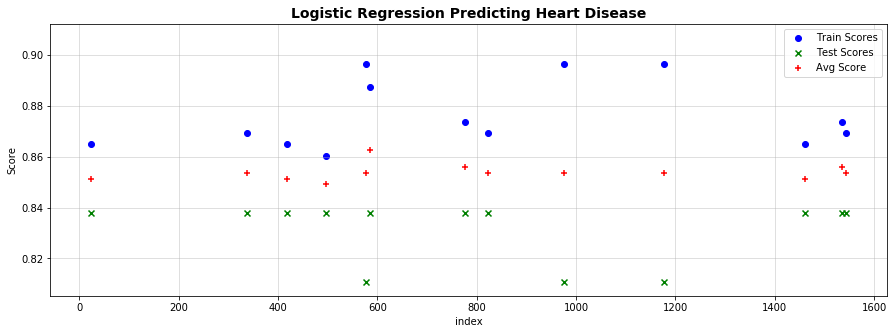

In [24]:
scatterPlot(finalists.index, finalists['Train Score'], finalists['Test Score'], finalists['Avg Score'], 
            'Train Scores', 'Test Scores', 'Avg Score', 'Logistic Regression Predicting Heart Disease', 'Score')

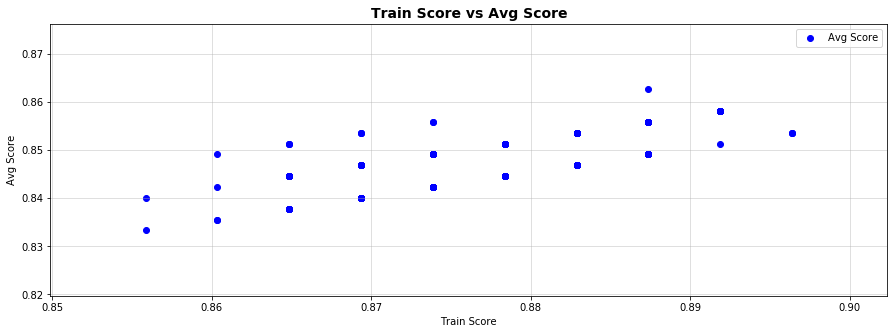

In [25]:
scatter(results['Train Score'], results['Avg Score'], 'Avg Score', 'Train Score vs Avg Score', 'Train Score', 'Avg Score')

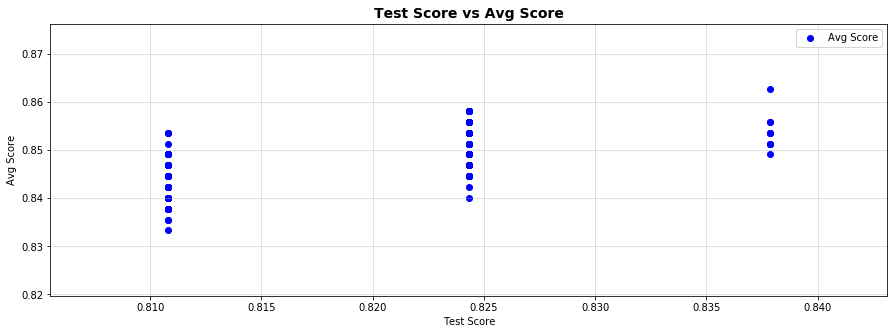

In [26]:
scatter(results['Test Score'], results['Avg Score'], 'Avg Score', 'Test Score vs Avg Score', 'Test Score', 'Avg Score')

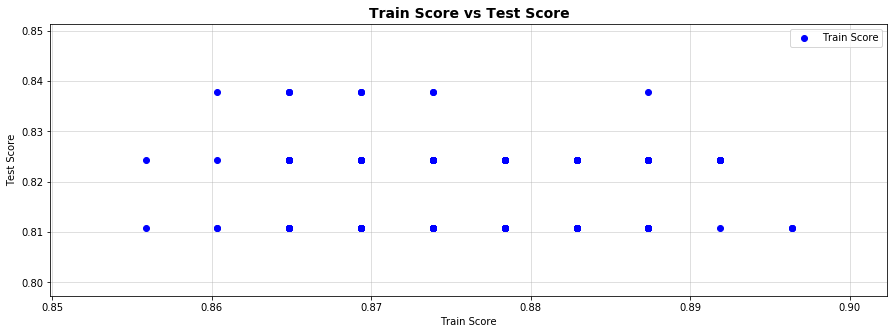

In [27]:
scatter(results['Train Score'], results['Test Score'], 'Train Score', 'Train Score vs Test Score', 'Train Score', 'Test Score')

# Create a New Model Based on the Best Inputs

In [28]:
# Logistic Regression
classifier = LogisticRegression(verbose=2, solver='saga', max_iter=1000)
classifier.fit(X_train_scaled, y_train_encoded)
trainScore = classifier.score(X_train_scaled, y_train_encoded)
testScore = classifier.score(X_test_scaled, y_test_encoded)
predictionsLR = classifier.predict(X_test_scaled)

convergence after 94 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


# Save the Model

In [29]:
filename = 'LR.sav'
joblib.dump(classifier, filename)

['LR.sav']

# Reload the Model to Ensure it Saved

In [30]:
classiferLoaded = joblib.load(filename)

# Create a Dataframe with Actual and Predicted Values

In [31]:
results = pd.DataFrame(list(zip(y_test_encoded, predictionsLR)), columns = ['Actual',
    'LR Prediction'])
frames = [results, X_test]
final = pd.concat(frames, sort=True, axis=1)
final['Result'] = final['Actual'] - final["LR Prediction"]
final

,Actual,LR Prediction,age,trestBps,cholesterol,maxHeartRate,oldPeak,sex_fem,sex_male,chestPain_abnang,...,slope_flat,slope_up,vesselsColored_0.0,vesselsColored_1.0,vesselsColored_2.0,vesselsColored_3.0,thal_fix,thal_norm,thal_rev,Result
0,1,1,57.0,130.0,131.0,115.0,1.2,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,1,66.0,112.0,212.0,132.0,0.1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,1,1,60.0,145.0,282.0,142.0,2.8,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,44.0,130.0,233.0,179.0,0.4,0,1,0,...,0,1,1,0,0,0,0,1,0,0
4,1,0,59.0,134.0,204.0,162.0,0.8,0,1,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0,0,45.0,115.0,260.0,185.0,0.0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
70,0,0,54.0,132.0,288.0,159.0,0.0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
71,0,0,40.0,140.0,199.0,178.0,1.4,0,1,0,...,0,1,1,0,0,0,0,0,1,0
72,0,0,66.0,150.0,226.0,114.0,2.6,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [32]:
# determine how many were right vs wrong
final['Result'].value_counts()

 0    61
 1     8
-1     5
Name: Result, dtype: int64

In [33]:
# Create data frames of correct and wrong results
differences = final['Result'] != 0
same = final['Result'] == 0
differences = final[differences]
same = final[same]
differences

,Actual,LR Prediction,age,trestBps,cholesterol,maxHeartRate,oldPeak,sex_fem,sex_male,chestPain_abnang,...,slope_flat,slope_up,vesselsColored_0.0,vesselsColored_1.0,vesselsColored_2.0,vesselsColored_3.0,thal_fix,thal_norm,thal_rev,Result
4,1,0,59.0,134.0,204.0,162.0,0.8,0,1,0,...,0,1,0,0,1,0,0,1,0,1
17,0,1,57.0,132.0,207.0,168.0,0.0,0,1,0,...,0,1,1,0,0,0,0,0,1,-1
26,1,0,58.0,136.0,319.0,152.0,0.0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
31,1,0,41.0,110.0,172.0,158.0,0.0,0,1,0,...,0,1,1,0,0,0,0,0,1,1
36,0,1,64.0,128.0,263.0,105.0,0.2,0,1,0,...,1,0,0,1,0,0,0,0,1,-1
37,1,0,40.0,152.0,223.0,181.0,0.0,0,1,0,...,0,1,1,0,0,0,0,0,1,1
38,1,0,45.0,110.0,264.0,132.0,1.2,0,1,0,...,1,0,1,0,0,0,0,0,1,1
46,0,1,53.0,142.0,226.0,111.0,0.0,0,1,0,...,0,1,1,0,0,0,0,0,1,-1
52,1,0,63.0,124.0,197.0,136.0,0.0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
59,1,0,57.0,130.0,236.0,174.0,0.0,1,0,1,...,1,0,0,1,0,0,0,1,0,1


# Plot Each Variable Input by Its Prediction
Determine if there is a statistical difference between the populations

Student t-test with unequal variance
Ttest_indResult(statistic=0.04423216482365827, pvalue=0.9651566673428489)

ANOVA test
F_onewayResult(statistic=0.00154858339366088, pvalue=0.9687186269516769)

Kruskal test
KruskalResult(statistic=0.001263747760232239, pvalue=0.9716417912229625)


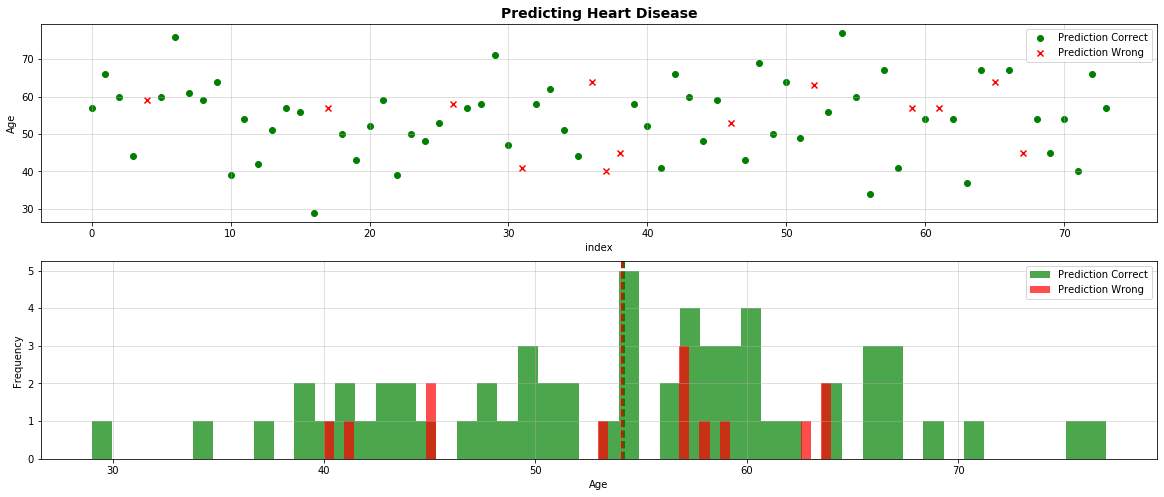

In [34]:
variableDataCompare(same.index, differences.index, same['age'], differences['age'],
            "Prediction Correct", "Prediction Wrong", "Predicting Heart Disease", "Age", "Frequency")

Student t-test with unequal variance
Ttest_indResult(statistic=1.1814653119387983, pvalue=0.2507367983812205)

ANOVA test
F_onewayResult(statistic=1.0469513611518044, pvalue=0.30963588385170177)

Kruskal test
KruskalResult(statistic=0.8711718444805714, pvalue=0.3506310967493266)


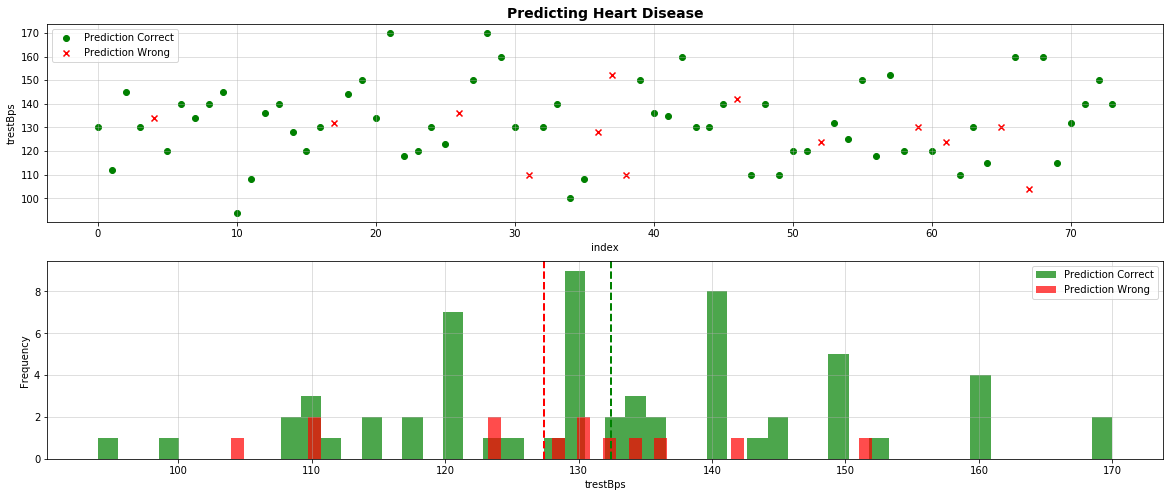

In [35]:
variableDataCompare(same.index, differences.index, same['trestBps'], differences['trestBps'],
            "Prediction Correct", "Prediction Wrong", "Predicting Heart Disease", "trestBps", "Frequency")

Student t-test with unequal variance
Ttest_indResult(statistic=-0.17100683885976192, pvalue=0.8657024234140717)

ANOVA test
F_onewayResult(statistic=0.019108183839014335, pvalue=0.8904426639394586)

Kruskal test
KruskalResult(statistic=0.20024624813885536, pvalue=0.6545221550051197)


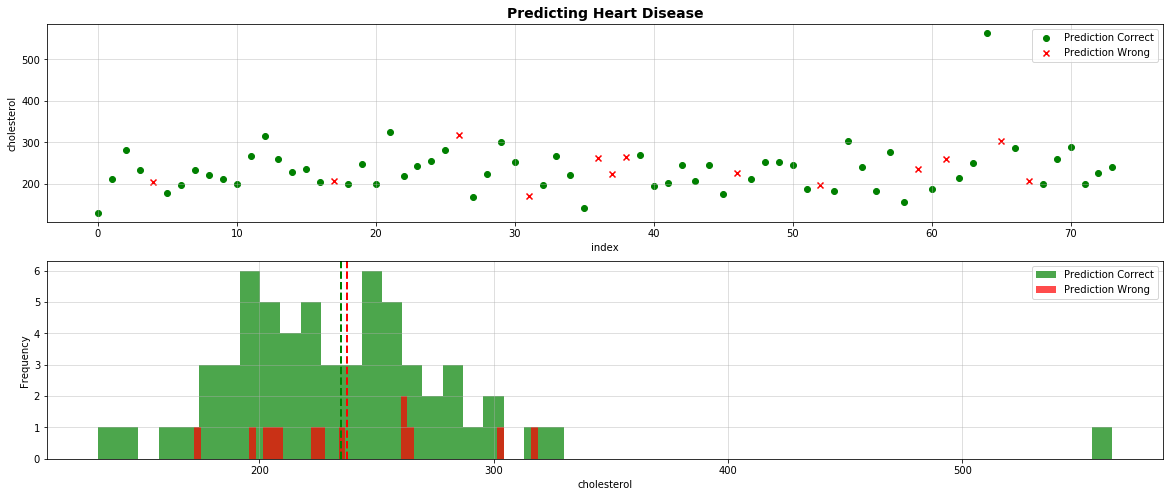

In [36]:
variableDataCompare(same.index, differences.index, same['cholesterol'], differences['cholesterol'],
            "Prediction Correct", "Prediction Wrong", "Predicting Heart Disease", "cholesterol", "Frequency")

Student t-test with unequal variance
Ttest_indResult(statistic=0.6043003535939533, pvalue=0.552796420517119)

ANOVA test
F_onewayResult(statistic=0.3151268102558783, pvalue=0.5762942028874773)

Kruskal test
KruskalResult(statistic=0.45565166083565845, pvalue=0.499663218140196)


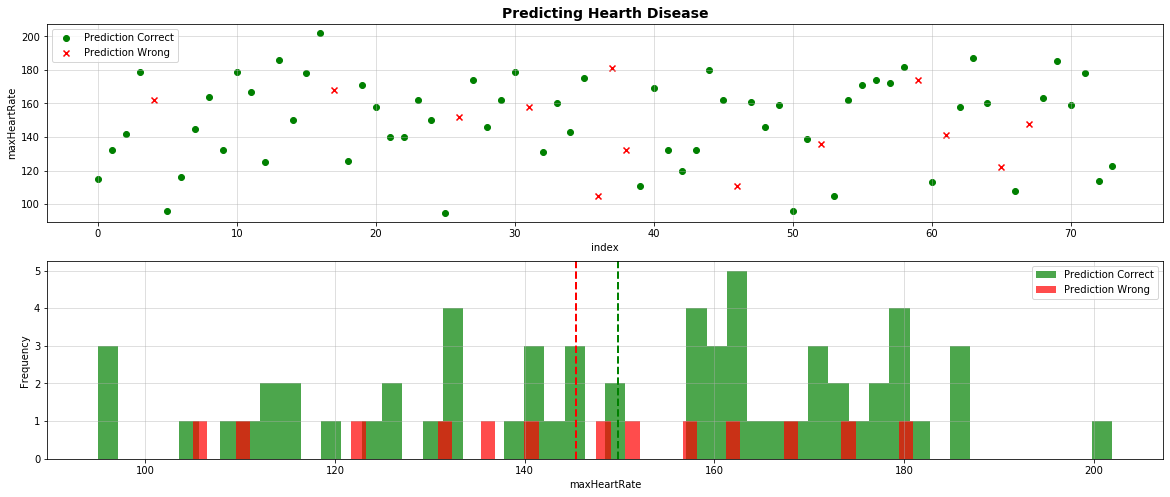

In [37]:
variableDataCompare(same.index, differences.index, same['maxHeartRate'], differences['maxHeartRate'],
            "Prediction Correct", "Prediction Wrong", "Predicting Hearth Disease", "maxHeartRate", "Frequency")

Student t-test with unequal variance
Ttest_indResult(statistic=1.4497580816629605, pvalue=0.16363407673491384)

ANOVA test
F_onewayResult(statistic=1.8500837501137277, pvalue=0.17801725154816164)

Kruskal test
KruskalResult(statistic=2.3178394973529373, pvalue=0.1278975574714827)


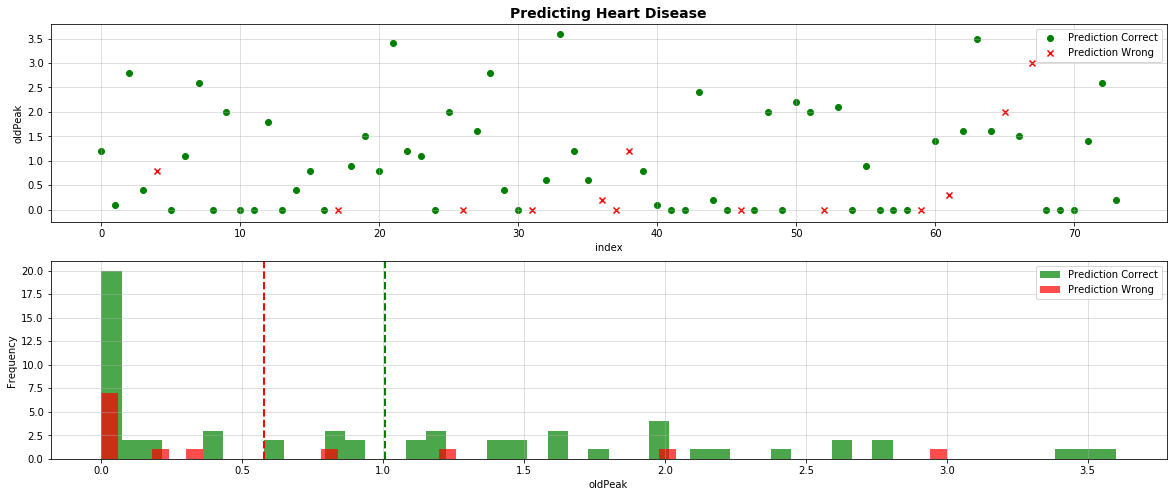

In [38]:
variableDataCompare(same.index, differences.index, same['oldPeak'], differences['oldPeak'],
            "Prediction Correct", "Prediction Wrong", "Predicting Heart Disease", "oldPeak", "Frequency")